# Metrics

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from sklearn.datasets import load_iris,make_moons,make_blobs,make_regression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,\
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report,\
    mean_squared_error,r2_score

### Part 1: Regression

A simple linear regression problem:

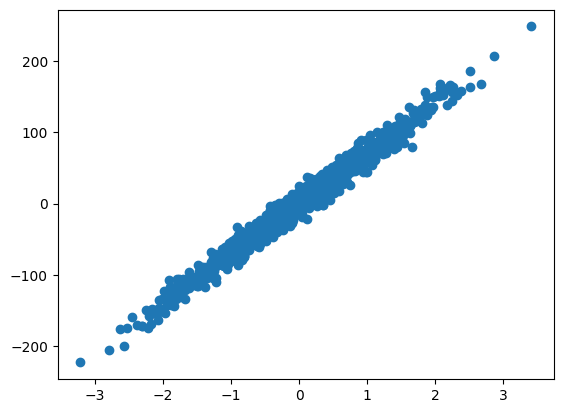

In [50]:
X,y=make_regression(n_samples=1000, n_features=1,noise=10.0)

plt.scatter(X,y)
plt.show()

In [51]:
model=LinearRegression().fit(X,y)

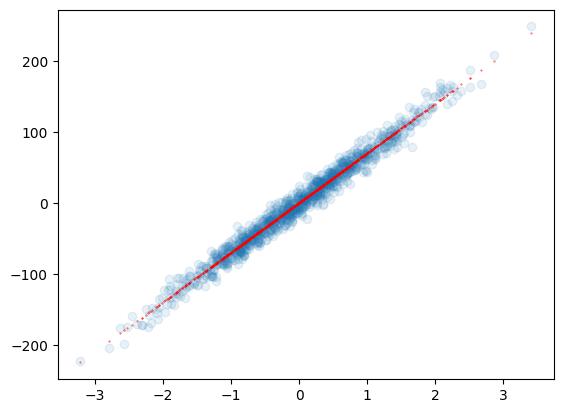

In [52]:
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [53]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 102.97438679461877
R2 score: 0.9775632606335118


Rescaling the data:

In [54]:
y=0.01*y

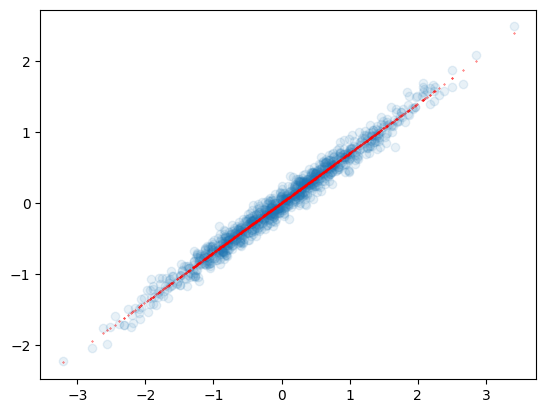

In [55]:
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [56]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 0.010297438679461876
R2 score: 0.9775632606335118


### Part 2: Binary Classification

We use the synthetic 'moons' data:

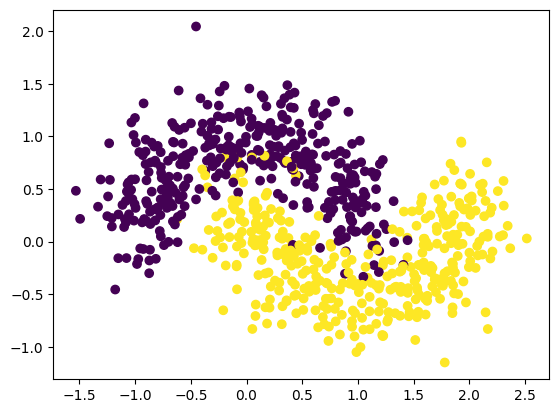

In [57]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

We look at the performance of SVM classifiers. Note that precision, recall and F1 here are maybe not so meaningful, since there is no natural 'positive' (minority) class here.

In [58]:
kernel_svm = SVC(kernel='rbf', gamma=0.1).fit(X_train,y_train)
predictions = kernel_svm.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[104  21]
 [ 17 108]]

Precision: 
0.8372093023255814

Recall: 
0.864

F1: 
0.8503937007874015


Now looking at the ROC curve:

Area under curve: 
0.946304


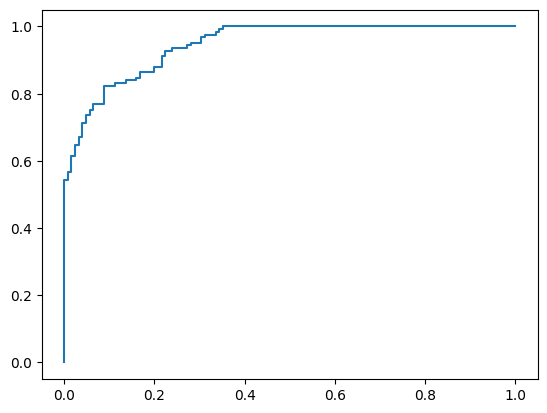

In [59]:
fprSVM,tprSVM,thresh = roc_curve(y_test,kernel_svm.decision_function(X_test))
plt.plot(fprSVM,tprSVM)
print("Area under curve: \n{}".format(roc_auc_score(y_test,kernel_svm.decision_function(X_test))) )

Precision-Recall curve:

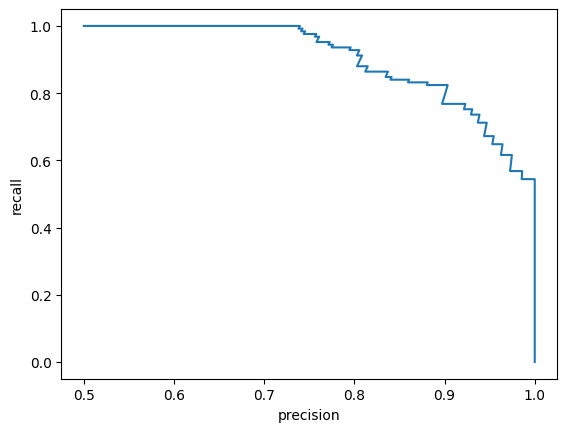

In [60]:
precSVM,recSVM,thresh = precision_recall_curve(y_test,kernel_svm.decision_function(X_test))
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precSVM,recSVM)
plt.show()

**Exercise 1:** Define separate costs for false positive and false negative classifications (assume that all correct classifications have zero cost). What is the expected misclassification loss that you get from the "default" classifier characterized by the confustion matrix above?  What is the minimal expected cost you can get from any of the points on the ROC curve?


In [67]:
#define cost functions for false positive and false negative
def cost_fp(y_true,y_pred):
    return 2*(y_true==0)*(y_pred==1)

def cost_fn(y_true,y_pred):
    return 1*(y_true==1)*(y_pred==0)

#calculate the cost of the classifier
def cost(y_true,y_pred):
    return np.sum(cost_fp(y_true,y_pred))+np.sum(cost_fn(y_true,y_pred))

#calculate the cost of the classifier for different thresholds
def cost_curve(y_true,scores):
    costs=[]
    for threshold in np.linspace(np.min(scores),np.max(scores),1000000):
        y_pred=1*(scores>threshold)
        costs.append(cost(y_true,y_pred))
    return costs

#find the minimum cost and the corresponding threshold
def find_best_threshold(y_true,scores):
    costs=cost_curve(y_true,scores)
    return np.min(costs),np.argmin(costs),np.linspace(np.min(scores),np.max(scores),1000000)[np.argmin(costs)]

#plot the cost curve
def plot_cost_curve(y_true,scores):
    costs=cost_curve(y_true,scores)
    plt.plot(np.linspace(np.min(scores),np.max(scores),1000000),costs)
    plt.xlabel('threshold')
    plt.ylabel('cost')
    plt.show()


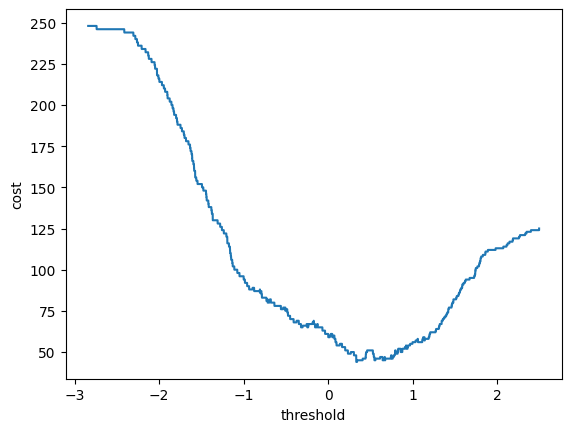

Best threshold: 0.33102148151427535
Cost: 44


In [68]:
#use the cost function to find the best threshold, and plot the cost curve
plot_cost_curve(y_test,kernel_svm.decision_function(X_test))
cost,ind,threshold=find_best_threshold(y_test,kernel_svm.decision_function(X_test))
print("Best threshold: {}".format(threshold))
print("Cost: {}".format(cost))

**Exercise 2 (self study):** try some other classifier(s) on this dataset, and compare their ROC/PR-curves. Do you find a classifier that strictly dominates  another in the sense that its ROC curve is always above the other? Define several different cost functions, so that different types of classifiers provide optimal solutions for different cost functions. 

###  Part 3: Multiclass Metrics

Constructing the confusion matrix from the slides from imaginary true and predicted label arrays:

In [30]:
truelabels = np.arange(220)
truelabels[0:100]=1
truelabels[100:110]=2
truelabels[110:120]=3
truelabels[120:220]=4
predlabels = np.arange(220)
predlabels[0:89]=1
predlabels[89:93]=2
predlabels[93:97]=3
predlabels[97:100]=4
predlabels[100:103]=2
predlabels[103:106]=3
predlabels[106:110]=4
predlabels[110:112]=1
predlabels[112:120]=3
predlabels[120:121]=1
predlabels[121:122]=3
predlabels[122:220]=4

In [31]:
print("Confusion matrix:  \n{}\n".format(confusion_matrix(truelabels,predlabels)))
print("Accuracy: \n{}\n".format(accuracy_score(truelabels,predlabels)))

Confusion matrix:  
[[89  4  4  3]
 [ 0  3  3  4]
 [ 2  0  8  0]
 [ 1  0  1 98]]

Accuracy: 
0.9



Now let's look at the averaged binary scores:



In [32]:
print("One-vs-all measures: \n{}\n".format(classification_report(truelabels,predlabels)))
print("Macro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='macro')))
print("Micro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='micro')))

One-vs-all measures: 
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       100
           2       0.43      0.30      0.35        10
           3       0.50      0.80      0.62        10
           4       0.93      0.98      0.96       100

    accuracy                           0.90       220
   macro avg       0.71      0.74      0.71       220
weighted avg       0.91      0.90      0.90       220


Macro average F1: 
0.7128766715410366

Micro average F1: 
0.9



**Exercise 3:** Construct two different 4x4 confusion matrices C1, C2, such that C1 has a higher accuracy score than C2, but C2 has a higher macro F1 score than C1.

### Part 3 Calibration

We use a fairly big sample from the make_moons data generator:

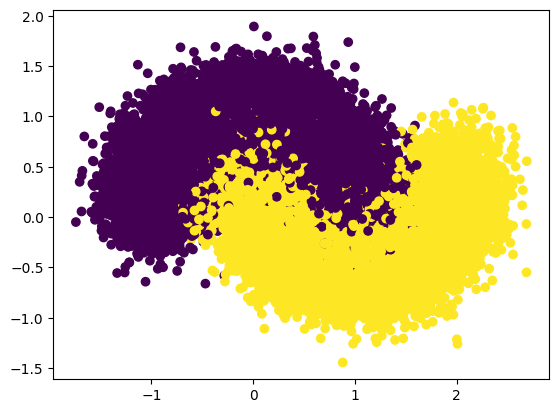

In [35]:
X, y = make_moons(n_samples=30000, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

Learn a Naive Bayes and a Neural network model:

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=[10],activation='tanh',solver='lbfgs', random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

/home/ebog/enviorments/PyTorch/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Construct histograms showing the distribution of probability predictions for the positive class. Histograms that are more concentrated at the extreme ends represent classifiers that are more 'confident' in their predictions

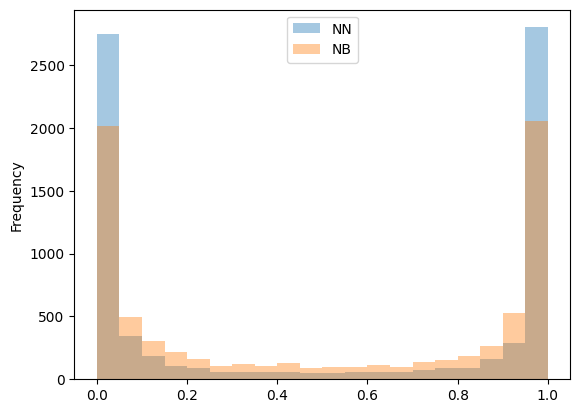

In [37]:
#print(mlp.predict_proba(X_test))
nnposprobas=mlp.predict_proba(X_test)[:,1]
nbposprobas=nb.predict_proba(X_test)[:,1]
pddf = pd.DataFrame({'NN' : nnposprobas, 'NB' : nbposprobas})
pddf.plot.hist(bins=20,alpha=0.4)
plt.show()

This distribution says nothing about calibration. For that we create a graph that plots the value *b* of the predicted probability for the positive class against the proportion of actually positive datapoints in the small interval (*b*,*b+binwidth*). We also plot a relative measure for how many datapoints fall into each bin.

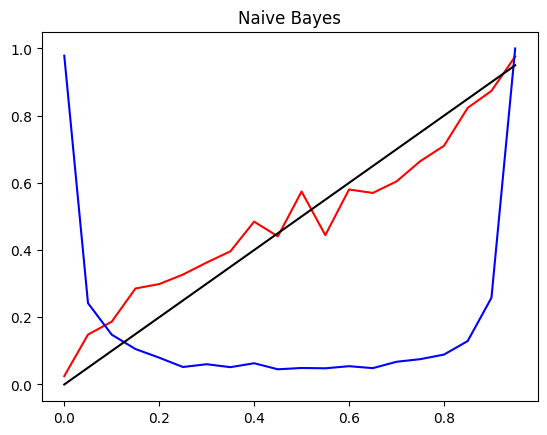

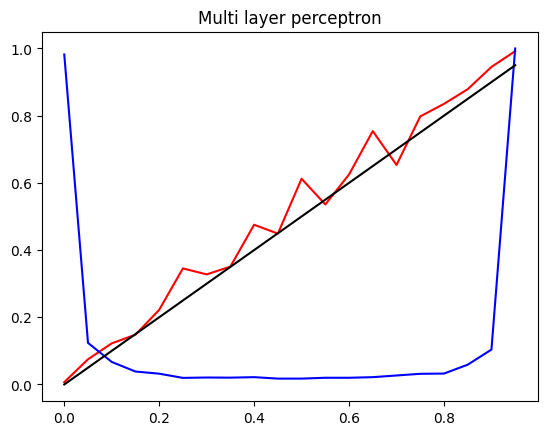

In [38]:
# posprobas=nbposprobas
# posprobas=nnposprobas

titles=["Naive Bayes","Multi layer perceptron"]

for j,posprobas in enumerate([nbposprobas,nnposprobas]):

    binwidth=0.05
    bins = np.arange(0,1,binwidth)
    predperc = np.zeros(bins.size)
    binexamples = np.zeros(bins.size)

    for i,b in enumerate(bins):
        preds = y_test[(posprobas >= b) & (posprobas < b+binwidth) ]
        predperc[i] = np.sum(preds)/preds.size
        binexamples[i]=preds.size

    binexamples*=1/np.max(binexamples)

    plt.plot(bins,predperc,c='r')
    plt.plot(bins,binexamples,c='b')
    plt.plot(bins,bins,c='black')
    plt.title(titles[j])
    plt.show()

We see that the naive Bayes curve follows the diagonal more closely, and thus it seems a bit better calibrated than the neural network. However, the deviations from the diagonal in the neural network case are caused by rather few examples. 